In [1]:
import pandas as pd 
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from six.moves import cPickle as pickle
from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
df=pd.read_csv('fordTrain.csv')
df1=pd.read_csv('fordTest.csv')
df=df.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1) 
df1=df1.drop(['TrialID','ObsNum','P8','V7','V9'],axis=1)
y_train=df['IsAlert']  # The labels for the train set
X_train=df.drop(['IsAlert'],axis=1) # The features of the train set

### 特征相关性

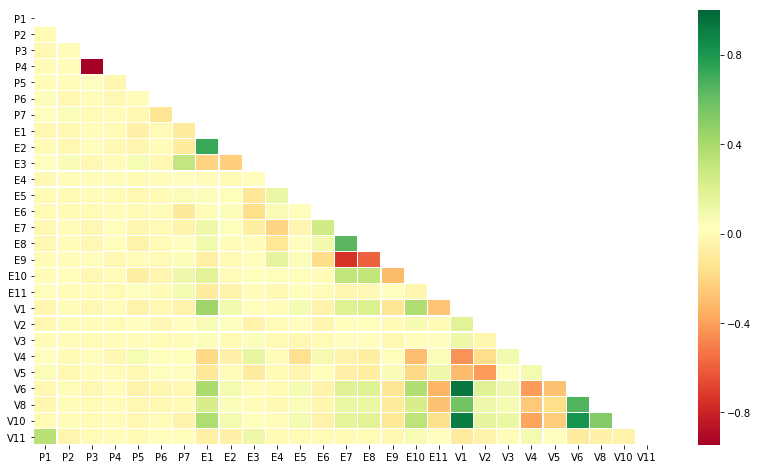

In [2]:
# Initiate correlation matrix
corr = X_train.corr()
# Set-up mask
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set-up figure
plt.figure(figsize=(14, 8))
# Correlation matrix
sns.heatmap(corr, mask=mask, annot=False,cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
plt.savefig('feature_correlation.png')
plt.show()

### 使用树模型分析特征重要性

In [2]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
model1 = RandomForestClassifier(criterion= 'gini',
                                max_depth = 400,
                                min_samples_leaf= 1,
                                min_samples_split= 2,
                                n_estimators= 400)
model1.fit(X_train,y_train)

model2 = XGBClassifier(booster='gbtree',
                       gamma= 0, 
                       learning_rate= 0.5,
                       max_depth= 400,
                       n_estimators= 400, 
                       objective= 'binary:logistic')

model2 = model2.fit(X_train,y_train)

model3 = LGBMClassifier(class_weight='balanced',drop_rate=0.9, min_data_in_leaf=100, max_bin=255,
                                 n_estimators=400,min_sum_hessian_in_leaf=1,importance_type='gain',learning_rate=0.3,bagging_fraction = 0.85,
                                 colsample_bytree = 1.0,feature_fraction = 0.1,lambda_l1 = 5.0,lambda_l2 = 3.0,max_depth =  400,
                                 min_child_samples = 55,min_child_weight = 5.0,min_split_gain = 0.1,num_leaves = 45,subsample = 0.75)  
model3.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.85, boosting_type='gbdt',
        class_weight='balanced', colsample_bytree=1.0, drop_rate=0.9,
        feature_fraction=0.1, importance_type='gain', lambda_l1=5.0,
        lambda_l2=3.0, learning_rate=0.3, max_bin=255, max_depth=400,
        min_child_samples=55, min_child_weight=5.0, min_data_in_leaf=100,
        min_split_gain=0.1, min_sum_hessian_in_leaf=1, n_estimators=400,
        n_jobs=-1, num_leaves=45, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=0.75,
        subsample_for_bin=200000, subsample_freq=0)

In [29]:
model4 = GradientBoostingClassifier(n_estimators=400)
model4.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=400,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

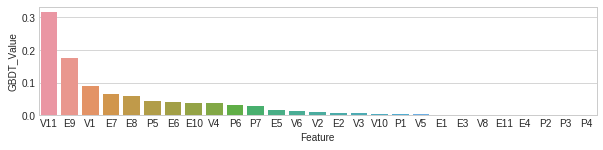

In [30]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,2)) 
feature_imp = pd.DataFrame(sorted(zip(model4 .feature_importances_,X_train.columns)), columns=['GBDT_Value','Feature'])
sns.barplot(x="Feature", y="GBDT_Value", data=feature_imp.sort_values(by="GBDT_Value", ascending=False))
plt.savefig('feature_importGBDT.png')
plt.show()

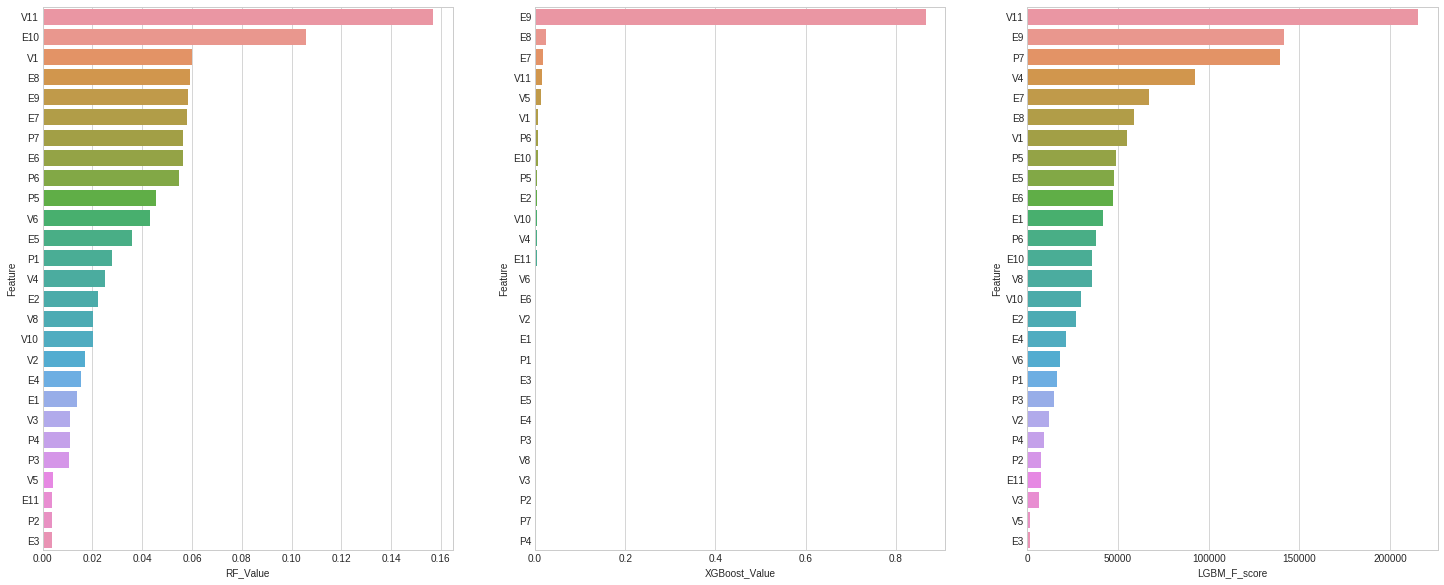

In [4]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

plt.subplot(1, 3, 1)
feature_imp = pd.DataFrame(sorted(zip(model1 .feature_importances_,X_train.columns)), columns=['RF_Value','Feature'])
sns.barplot(x="RF_Value", y="Feature", data=feature_imp.sort_values(by="RF_Value", ascending=False))
plt.subplot(1, 3, 2)
feature_imp = pd.DataFrame(sorted(zip(model2 .feature_importances_,X_train.columns)), columns=['XGBoost_Value','Feature'])
sns.barplot(x="XGBoost_Value", y="Feature", data=feature_imp.sort_values(by="XGBoost_Value", ascending=False))
plt.subplot(1, 3, 3)
feature_imp = pd.DataFrame(sorted(zip(model3 .feature_importances_,X_train.columns)), columns=['LGBM_F_score','Feature'])
sns.barplot(x="LGBM_F_score", y="Feature", data=feature_imp.sort_values(by="LGBM_F_score", ascending=False))
plt.savefig('feature_important-3.png')
plt.show()

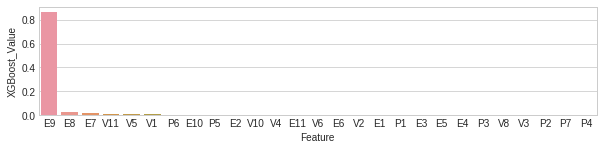

In [23]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,2)) 
feature_imp = pd.DataFrame(sorted(zip(model2 .feature_importances_,X_train.columns)), columns=['XGBoost_Value','Feature'])
sns.barplot(x="Feature", y="XGBoost_Value", data=feature_imp.sort_values(by="XGBoost_Value", ascending=False))
plt.savefig('feature_importXGB.png')
plt.show()

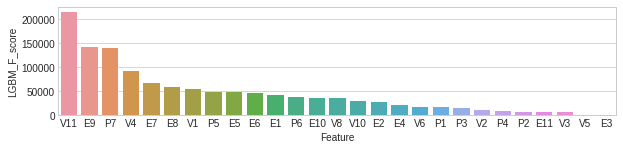

In [26]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,2)) 
feature_imp = pd.DataFrame(sorted(zip(model3 .feature_importances_,X_train.columns)), columns=['LGBM_F_score','Feature'])
sns.barplot(x="Feature", y="LGBM_F_score", data=feature_imp.sort_values(by="LGBM_F_score", ascending=False))
plt.savefig('feature_importLGBM.png')
plt.show()

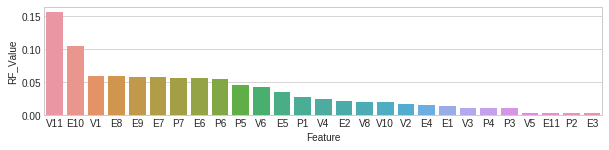

In [27]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(10,2)) 
feature_imp1 = pd.DataFrame(sorted(zip(model1 .feature_importances_,X_train.columns)), columns=['RF_Value','Feature'])
sns.barplot(x="Feature", y="RF_Value", data=feature_imp1.sort_values(by="RF_Value", ascending=False))

plt.savefig('feature_importRF.png')
plt.show()

### PCA

/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/wcx/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/wcx/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


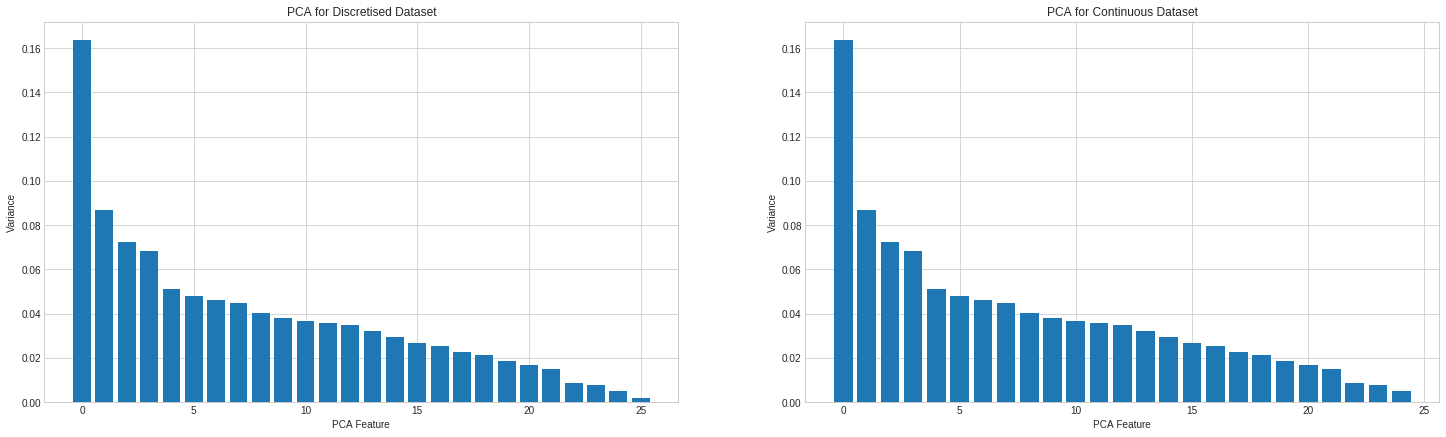

In [5]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
# Calculating PCA for both datasets, and graphing the Variance for each feature, per dataset
std_scale = preprocessing.StandardScaler().fit(X_train)
X = std_scale.transform(X_train)
pca1 = PCA(n_components=len(X_train.columns)-1)
fit1 = pca1.fit(X)

std_scale = preprocessing.StandardScaler().fit(X_train)
X = std_scale.transform(X_train)
pca2 = PCA(n_components=len(X_train.columns)-2)
fit2 = pca2.fit(X)

# Graphing the variance per feature
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,7)) 

plt.subplot(1, 2, 1)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Discretised Dataset')
plt.bar(range(0, fit1.explained_variance_ratio_.size), fit1.explained_variance_ratio_);

plt.subplot(1, 2, 2)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.title('PCA for Continuous Dataset')
plt.bar(range(0, fit2.explained_variance_ratio_.size), fit2.explained_variance_ratio_);

/home/wcx/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/wcx/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


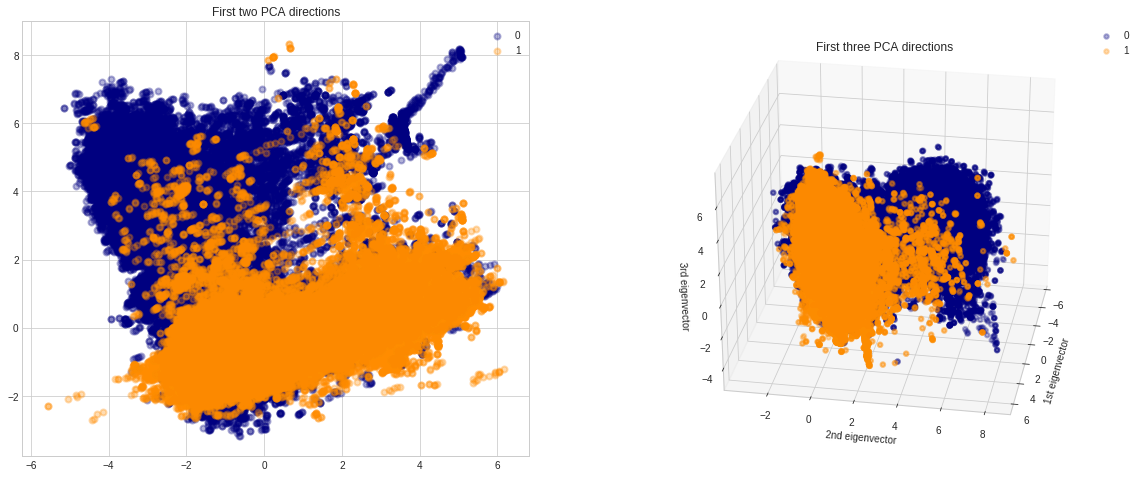

In [7]:
from mpl_toolkits.mplot3d import Axes3D
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scale = preprocessing.StandardScaler().fit(X_train)
X = std_scale.transform(X_train)
y = y_train

# Formatting
target_names = [0,1]
colors = ['navy','darkorange']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('First two PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], target_names):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)

### 结合交叉验证的特征递归消除寻找最优特征数量

In [10]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

selector1 = RFECV(LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False), step=1, cv=5, scoring='accuracy')
selector1.fit(X_train, y_train)

RFECV(cv=5,
   estimator=LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [12]:
selector2 = RFECV(DecisionTreeClassifier(criterion='entropy' , max_depth = 30), step=1, cv=5, scoring='accuracy')
selector2 = selector2.fit(X_train, y_train)

In [13]:
selector3 = RFECV(RandomForestClassifier(criterion='gini',
            max_depth=100, max_features=0.2, n_estimators=300,), step=1, cv=5,scoring='accuracy')
selector3 = selector3.fit(X_train, y_train)

In [14]:
selector4 = RFECV(GradientBoostingClassifier(), step=1, cv=5, scoring='accuracy')
selector4 = selector4.fit(X_train, y_train)

In [15]:
selector5 = RFECV(XGBClassifier(booster='gbtree',
                       gamma= 0, 
                       learning_rate= 0.7,
                       max_depth=30,
                       n_estimators= 400, 
                       objective= 'binary:logistic'), step=1, cv=5, scoring='accuracy')
selector5 = selector5.fit(X_train, y_train)

In [ ]:
selector6 = RFECV(LGBMClassifier(boosting_type = 'gbdt',
                        learning_rate = 0.3,
                        max_depth = 27,
                        n_estimators = 400,
                        num_leaves = 30), step=1, cv=5, scoring='accuracy')
selector6 = selector6.fit(X_train, y_train)

In [ ]:
selector7 = RFECV(SGDClassifier(n_jobs = -1), step=1, cv=5, scoring='accuracy')
selector7 = selector7.fit(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
svc = SVC(kernel='linear', C=0.4, cache_size=1000, max_iter=1000)
selector8 = RFECV(estimator=svc, step=1, cv=3, scoring='accuracy', n_jobs=-1)
selector8 = selector8.fit(X_train, y_train)

In [ ]:
# Plot number of features VS. cross-validation scores
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(11,11)) 
plt.xlabel("Number of features selected")
plt.ylabel("Holdout score")
plt.plot(range(1, len(selector1.grid_scores_) + 1), selector1.grid_scores_, label ='LogisticRegression' );
plt.plot(range(1, len(selector3.grid_scores_) + 1), selector2.grid_scores_, label ='DecisionTree' );
plt.plot(range(1, len(selector4.grid_scores_) + 1), selector3.grid_scores_, label ='RandomForestClassifier' );
plt.plot(range(1, len(selector5.grid_scores_) + 1), selector4.grid_scores_, label ='GradientBoostingClassifier' );
plt.plot(range(1, len(selector8.grid_scores_) + 1), selector7.grid_scores_, label ='SGDClassifier' );
plt.plot(range(1, len(selector6.grid_scores_) + 1), selector5.grid_scores_, label ='XGBClassifier' );
plt.plot(range(1, len(selector7.grid_scores_) + 1), selector6.grid_scores_, label ='LGBMClassifier' );
plt.plot(range(1, len(selector2.grid_scores_) + 1), selector8.grid_scores_, label ='SVM' );
plt.legend(loc='lower right')
plt.savefig('holdoutscore8.png', bbox_inches='tight', pad_inches=1)
plt.show()